In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv("fire_confidence_predictor.csv")

In [6]:
df.info() # No non null entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36011 entries, 0 to 36010
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    36011 non-null  float64
 1   longitude   36011 non-null  float64
 2   brightness  36011 non-null  float64
 3   scan        36011 non-null  float64
 4   track       36011 non-null  float64
 5   acq_date    36011 non-null  object 
 6   acq_time    36011 non-null  int64  
 7   satellite   36011 non-null  object 
 8   instrument  36011 non-null  object 
 9   confidence  36011 non-null  int64  
 10  version     36011 non-null  float64
 11  bright_t31  36011 non-null  float64
 12  frp         36011 non-null  float64
 13  daynight    36011 non-null  object 
 14  type        36011 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 4.1+ MB


In [7]:
df.acq_date = pd.to_datetime(df['acq_date'])

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

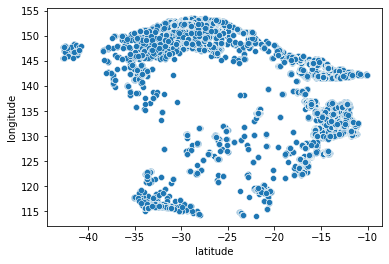

In [8]:
sns.scatterplot(x='latitude',y='longitude',data=df)

<AxesSubplot:xlabel='confidence', ylabel='Density'>

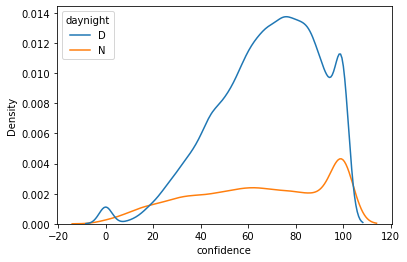

In [9]:
sns.kdeplot(df.confidence,hue=df.daynight)

<AxesSubplot:xlabel='confidence', ylabel='Density'>

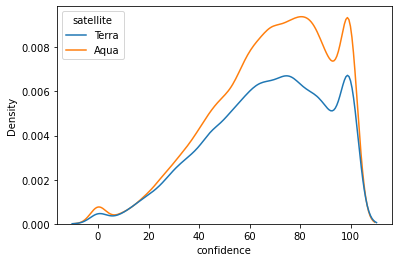

In [10]:
sns.kdeplot(df.confidence,hue=df.satellite)

<AxesSubplot:xlabel='bright_t31', ylabel='confidence'>

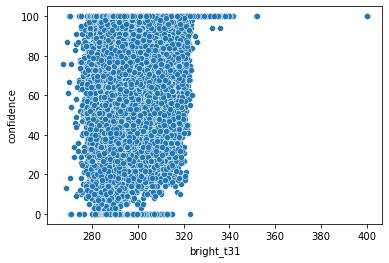

In [29]:
sns.scatterplot(x='bright_t31',y='confidence',data=df)

In [11]:
df.drop(['instrument','acq_time'],axis=1,inplace=True)

In [12]:
df.drop(['version','scan','track'],axis=1,inplace=True)

In [13]:
df.drop(['type'],axis=1,inplace=True)

<AxesSubplot:ylabel='Density'>

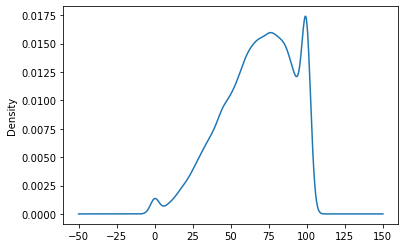

In [24]:
df.confidence.plot(kind='kde')

In [93]:
df

,latitude,longitude,brightness,acq_date,satellite,confidence,bright_t31,frp,daynight
0,-11.8070,142.0583,313.0,2019-08-01,0,48,297.3,6.6,0
1,-11.7924,142.0850,319.3,2019-08-01,0,71,297.3,11.3,0
2,-12.8398,132.8744,311.6,2019-08-01,0,42,298.7,23.1,0
3,-14.4306,143.3035,310.1,2019-08-01,0,33,296.1,6.5,0
4,-12.4953,131.4897,310.3,2019-08-01,0,36,298.8,27.6,0
...,...,...,...,...,...,...,...,...,...
36006,-28.0656,131.6334,312.7,2019-09-30,1,85,292.9,14.2,1
36007,-28.2625,128.5494,304.9,2019-09-30,1,27,290.9,6.4,1
36008,-28.2941,128.5123,301.7,2019-09-30,1,43,290.4,5.5,1
36009,-28.3001,128.5530,303.6,2019-09-30,1,41,290.3,5.7,1


In [94]:
df['daynight'].replace({'D':0,'N':1},inplace=True)
df['satellite'].replace({'Terra':0,'Aqua':1},inplace=True)

In [108]:
X = df.drop('confidence',axis=1)
X.drop('acq_date',axis=1,inplace=True)
y = df.confidence

In [100]:
from catboost import CatBoostRegressor

from sklearn.model_selection import train_test_split
import numpy as np

from sklearn.metrics import mean_squared_error

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [75]:
clf = CatBoostRegressor(loss_function='RMSE',learning_rate=0.05)

In [63]:
clf.fit(X_train,y_train,verbose=2)

0:	learn: 21.9760081	total: 6.13ms	remaining: 6.13s
2:	learn: 20.0073640	total: 15.1ms	remaining: 5.03s
4:	learn: 18.5641927	total: 24.2ms	remaining: 4.82s
6:	learn: 17.4977323	total: 32.7ms	remaining: 4.64s
8:	learn: 16.6880908	total: 42.8ms	remaining: 4.71s
10:	learn: 16.1447779	total: 52.3ms	remaining: 4.7s
12:	learn: 15.7055771	total: 61.1ms	remaining: 4.64s
14:	learn: 15.3568771	total: 70.3ms	remaining: 4.62s
16:	learn: 15.1080791	total: 79.5ms	remaining: 4.59s
18:	learn: 14.9147439	total: 88.5ms	remaining: 4.57s
20:	learn: 14.7400872	total: 96.6ms	remaining: 4.5s
22:	learn: 14.6181732	total: 105ms	remaining: 4.47s
24:	learn: 14.5216662	total: 114ms	remaining: 4.45s
26:	learn: 14.4241859	total: 123ms	remaining: 4.42s
28:	learn: 14.3346835	total: 132ms	remaining: 4.41s
30:	learn: 14.2562956	total: 140ms	remaining: 4.39s
32:	learn: 14.1978943	total: 149ms	remaining: 4.37s
34:	learn: 14.1391477	total: 158ms	remaining: 4.37s
36:	learn: 14.1016776	total: 167ms	remaining: 4.35s
38:	lear

320:	learn: 11.9926149	total: 1.39s	remaining: 2.94s
322:	learn: 11.9805200	total: 1.4s	remaining: 2.93s
324:	learn: 11.9709645	total: 1.41s	remaining: 2.92s
326:	learn: 11.9629572	total: 1.41s	remaining: 2.91s
328:	learn: 11.9541909	total: 1.42s	remaining: 2.9s
330:	learn: 11.9463462	total: 1.43s	remaining: 2.89s
332:	learn: 11.9346274	total: 1.44s	remaining: 2.88s
334:	learn: 11.9274498	total: 1.45s	remaining: 2.87s
336:	learn: 11.9192247	total: 1.46s	remaining: 2.86s
338:	learn: 11.9114987	total: 1.46s	remaining: 2.85s
340:	learn: 11.9045789	total: 1.47s	remaining: 2.85s
342:	learn: 11.8932097	total: 1.48s	remaining: 2.84s
344:	learn: 11.8847739	total: 1.49s	remaining: 2.83s
346:	learn: 11.8784146	total: 1.5s	remaining: 2.82s
348:	learn: 11.8665486	total: 1.51s	remaining: 2.81s
350:	learn: 11.8580869	total: 1.51s	remaining: 2.8s
352:	learn: 11.8525837	total: 1.52s	remaining: 2.79s
354:	learn: 11.8451087	total: 1.53s	remaining: 2.79s
356:	learn: 11.8319956	total: 1.54s	remaining: 2.7

640:	learn: 10.8003633	total: 2.75s	remaining: 1.54s
642:	learn: 10.7923529	total: 2.76s	remaining: 1.53s
644:	learn: 10.7869432	total: 2.77s	remaining: 1.52s
646:	learn: 10.7791073	total: 2.78s	remaining: 1.52s
648:	learn: 10.7710242	total: 2.79s	remaining: 1.51s
650:	learn: 10.7642202	total: 2.8s	remaining: 1.5s
652:	learn: 10.7538977	total: 2.81s	remaining: 1.49s
654:	learn: 10.7478039	total: 2.81s	remaining: 1.48s
656:	learn: 10.7378930	total: 2.82s	remaining: 1.47s
658:	learn: 10.7322955	total: 2.83s	remaining: 1.46s
660:	learn: 10.7243215	total: 2.84s	remaining: 1.46s
662:	learn: 10.7166471	total: 2.85s	remaining: 1.45s
664:	learn: 10.7115308	total: 2.86s	remaining: 1.44s
666:	learn: 10.7033244	total: 2.86s	remaining: 1.43s
668:	learn: 10.6926075	total: 2.87s	remaining: 1.42s
670:	learn: 10.6859680	total: 2.88s	remaining: 1.41s
672:	learn: 10.6806112	total: 2.89s	remaining: 1.4s
674:	learn: 10.6734957	total: 2.9s	remaining: 1.4s
676:	learn: 10.6656965	total: 2.91s	remaining: 1.39

966:	learn: 9.8351146	total: 4.15s	remaining: 142ms
968:	learn: 9.8287579	total: 4.16s	remaining: 133ms
970:	learn: 9.8240741	total: 4.17s	remaining: 125ms
972:	learn: 9.8194193	total: 4.18s	remaining: 116ms
974:	learn: 9.8146555	total: 4.19s	remaining: 107ms
976:	learn: 9.8083257	total: 4.19s	remaining: 98.8ms
978:	learn: 9.8046417	total: 4.2s	remaining: 90.2ms
980:	learn: 9.7994097	total: 4.21s	remaining: 81.6ms
982:	learn: 9.7938064	total: 4.22s	remaining: 73ms
984:	learn: 9.7897449	total: 4.23s	remaining: 64.4ms
986:	learn: 9.7848410	total: 4.24s	remaining: 55.8ms
988:	learn: 9.7792859	total: 4.24s	remaining: 47.2ms
990:	learn: 9.7750169	total: 4.25s	remaining: 38.6ms
992:	learn: 9.7676938	total: 4.26s	remaining: 30ms
994:	learn: 9.7626808	total: 4.27s	remaining: 21.5ms
996:	learn: 9.7563898	total: 4.28s	remaining: 12.9ms
998:	learn: 9.7506631	total: 4.29s	remaining: 4.29ms
999:	learn: 9.7491146	total: 4.29s	remaining: 0us


In [64]:
y_pred = clf.predict(X_test)

In [65]:
np.sqrt(mean_squared_error(y_test,y_pred))

13.16003310361343

## Cross Validation

In [66]:
from sklearn.model_selection import KFold

In [67]:
cv = KFold(n_splits = 5)

In [76]:
rmse = []
for train_ind, test_ind in cv.split(X, y):
    X_train = X.loc[train_ind]
    y_train = y.loc[train_ind]
    
    X_test = X.loc[test_ind]
    y_test = y.loc[test_ind]
    
    
    clf.fit(X_train,y_train)
    
    rmse.append(np.sqrt(mean_squared_error(y_test,clf.predict(X_test))))

0:	learn: 22.8308926	total: 2.82ms	remaining: 2.82s
1:	learn: 22.2945512	total: 5.53ms	remaining: 2.76s
2:	learn: 21.7897175	total: 8.92ms	remaining: 2.96s
3:	learn: 21.3143551	total: 12.5ms	remaining: 3.12s
4:	learn: 20.8629715	total: 16.1ms	remaining: 3.21s
5:	learn: 20.4601688	total: 19.4ms	remaining: 3.22s
6:	learn: 20.0763066	total: 22.7ms	remaining: 3.21s
7:	learn: 19.7205308	total: 26.6ms	remaining: 3.29s
8:	learn: 19.3909094	total: 30.2ms	remaining: 3.32s
9:	learn: 19.0759363	total: 33.7ms	remaining: 3.33s
10:	learn: 18.7917166	total: 36.7ms	remaining: 3.3s
11:	learn: 18.5180914	total: 39.8ms	remaining: 3.28s
12:	learn: 18.2640150	total: 43.2ms	remaining: 3.28s
13:	learn: 18.0341832	total: 46.5ms	remaining: 3.28s
14:	learn: 17.8095842	total: 49.9ms	remaining: 3.27s
15:	learn: 17.5967308	total: 53.1ms	remaining: 3.26s
16:	learn: 17.4097436	total: 56.4ms	remaining: 3.26s
17:	learn: 17.2319773	total: 59.4ms	remaining: 3.24s
18:	learn: 17.0799246	total: 62.7ms	remaining: 3.24s
19:	

174:	learn: 14.0068882	total: 582ms	remaining: 2.74s
175:	learn: 14.0029733	total: 585ms	remaining: 2.74s
176:	learn: 13.9985460	total: 588ms	remaining: 2.73s
177:	learn: 13.9951040	total: 592ms	remaining: 2.73s
178:	learn: 13.9928631	total: 596ms	remaining: 2.73s
179:	learn: 13.9891086	total: 599ms	remaining: 2.73s
180:	learn: 13.9845453	total: 602ms	remaining: 2.72s
181:	learn: 13.9811942	total: 604ms	remaining: 2.72s
182:	learn: 13.9807365	total: 606ms	remaining: 2.71s
183:	learn: 13.9778362	total: 609ms	remaining: 2.7s
184:	learn: 13.9759010	total: 613ms	remaining: 2.7s
185:	learn: 13.9732309	total: 616ms	remaining: 2.69s
186:	learn: 13.9704474	total: 620ms	remaining: 2.69s
187:	learn: 13.9664529	total: 623ms	remaining: 2.69s
188:	learn: 13.9614588	total: 626ms	remaining: 2.69s
189:	learn: 13.9571964	total: 630ms	remaining: 2.68s
190:	learn: 13.9528664	total: 633ms	remaining: 2.68s
191:	learn: 13.9506297	total: 636ms	remaining: 2.68s
192:	learn: 13.9464338	total: 640ms	remaining: 2

347:	learn: 13.4863506	total: 1.16s	remaining: 2.17s
348:	learn: 13.4839853	total: 1.16s	remaining: 2.16s
349:	learn: 13.4824920	total: 1.16s	remaining: 2.16s
350:	learn: 13.4804781	total: 1.17s	remaining: 2.16s
351:	learn: 13.4785104	total: 1.17s	remaining: 2.15s
352:	learn: 13.4757532	total: 1.17s	remaining: 2.15s
353:	learn: 13.4730841	total: 1.18s	remaining: 2.15s
354:	learn: 13.4696358	total: 1.18s	remaining: 2.15s
355:	learn: 13.4665647	total: 1.18s	remaining: 2.14s
356:	learn: 13.4649932	total: 1.19s	remaining: 2.14s
357:	learn: 13.4626028	total: 1.19s	remaining: 2.14s
358:	learn: 13.4610064	total: 1.2s	remaining: 2.13s
359:	learn: 13.4586857	total: 1.2s	remaining: 2.13s
360:	learn: 13.4575287	total: 1.2s	remaining: 2.13s
361:	learn: 13.4551189	total: 1.21s	remaining: 2.13s
362:	learn: 13.4526312	total: 1.21s	remaining: 2.12s
363:	learn: 13.4495355	total: 1.21s	remaining: 2.12s
364:	learn: 13.4484132	total: 1.22s	remaining: 2.11s
365:	learn: 13.4457677	total: 1.22s	remaining: 2.

517:	learn: 13.1234060	total: 1.73s	remaining: 1.61s
518:	learn: 13.1218234	total: 1.73s	remaining: 1.6s
519:	learn: 13.1207169	total: 1.73s	remaining: 1.6s
520:	learn: 13.1191246	total: 1.74s	remaining: 1.6s
521:	learn: 13.1180833	total: 1.74s	remaining: 1.59s
522:	learn: 13.1160371	total: 1.74s	remaining: 1.59s
523:	learn: 13.1133085	total: 1.75s	remaining: 1.59s
524:	learn: 13.1108671	total: 1.75s	remaining: 1.58s
525:	learn: 13.1087660	total: 1.75s	remaining: 1.58s
526:	learn: 13.1072341	total: 1.76s	remaining: 1.58s
527:	learn: 13.1045246	total: 1.76s	remaining: 1.57s
528:	learn: 13.1017100	total: 1.76s	remaining: 1.57s
529:	learn: 13.0998370	total: 1.77s	remaining: 1.57s
530:	learn: 13.0978474	total: 1.77s	remaining: 1.56s
531:	learn: 13.0967843	total: 1.77s	remaining: 1.56s
532:	learn: 13.0940706	total: 1.78s	remaining: 1.56s
533:	learn: 13.0917355	total: 1.78s	remaining: 1.55s
534:	learn: 13.0909021	total: 1.78s	remaining: 1.55s
535:	learn: 13.0886501	total: 1.79s	remaining: 1.

690:	learn: 12.8382434	total: 2.3s	remaining: 1.03s
691:	learn: 12.8355163	total: 2.31s	remaining: 1.03s
692:	learn: 12.8336150	total: 2.31s	remaining: 1.02s
693:	learn: 12.8322478	total: 2.31s	remaining: 1.02s
694:	learn: 12.8306072	total: 2.32s	remaining: 1.02s
695:	learn: 12.8300481	total: 2.32s	remaining: 1.01s
696:	learn: 12.8289340	total: 2.32s	remaining: 1.01s
697:	learn: 12.8277370	total: 2.33s	remaining: 1.01s
698:	learn: 12.8263185	total: 2.33s	remaining: 1s
699:	learn: 12.8249571	total: 2.33s	remaining: 1s
700:	learn: 12.8232986	total: 2.34s	remaining: 997ms
701:	learn: 12.8225172	total: 2.34s	remaining: 994ms
702:	learn: 12.8208865	total: 2.34s	remaining: 991ms
703:	learn: 12.8184795	total: 2.35s	remaining: 988ms
704:	learn: 12.8172247	total: 2.35s	remaining: 984ms
705:	learn: 12.8155455	total: 2.35s	remaining: 981ms
706:	learn: 12.8142082	total: 2.36s	remaining: 977ms
707:	learn: 12.8126100	total: 2.36s	remaining: 974ms
708:	learn: 12.8108722	total: 2.36s	remaining: 970ms


858:	learn: 12.5862383	total: 2.88s	remaining: 473ms
859:	learn: 12.5856248	total: 2.89s	remaining: 470ms
860:	learn: 12.5841655	total: 2.89s	remaining: 467ms
861:	learn: 12.5817257	total: 2.9s	remaining: 464ms
862:	learn: 12.5800795	total: 2.9s	remaining: 461ms
863:	learn: 12.5789602	total: 2.9s	remaining: 457ms
864:	learn: 12.5772224	total: 2.91s	remaining: 454ms
865:	learn: 12.5766655	total: 2.92s	remaining: 451ms
866:	learn: 12.5756792	total: 2.92s	remaining: 448ms
867:	learn: 12.5741871	total: 2.92s	remaining: 445ms
868:	learn: 12.5731642	total: 2.93s	remaining: 442ms
869:	learn: 12.5715987	total: 2.94s	remaining: 439ms
870:	learn: 12.5699429	total: 2.94s	remaining: 436ms
871:	learn: 12.5690903	total: 2.94s	remaining: 432ms
872:	learn: 12.5684000	total: 2.95s	remaining: 429ms
873:	learn: 12.5676327	total: 2.95s	remaining: 426ms
874:	learn: 12.5666363	total: 2.96s	remaining: 423ms
875:	learn: 12.5648988	total: 2.96s	remaining: 419ms
876:	learn: 12.5640749	total: 2.97s	remaining: 41

21:	learn: 16.6502535	total: 81.7ms	remaining: 3.63s
22:	learn: 16.5388570	total: 85ms	remaining: 3.61s
23:	learn: 16.4362911	total: 88.2ms	remaining: 3.59s
24:	learn: 16.3241895	total: 92.6ms	remaining: 3.61s
25:	learn: 16.2428098	total: 95.5ms	remaining: 3.58s
26:	learn: 16.1637990	total: 99.1ms	remaining: 3.57s
27:	learn: 16.0750313	total: 103ms	remaining: 3.56s
28:	learn: 16.0003570	total: 106ms	remaining: 3.54s
29:	learn: 15.9334584	total: 110ms	remaining: 3.55s
30:	learn: 15.8642987	total: 113ms	remaining: 3.52s
31:	learn: 15.7996475	total: 116ms	remaining: 3.52s
32:	learn: 15.7434298	total: 120ms	remaining: 3.53s
33:	learn: 15.6818449	total: 126ms	remaining: 3.57s
34:	learn: 15.6095241	total: 129ms	remaining: 3.55s
35:	learn: 15.5434429	total: 132ms	remaining: 3.52s
36:	learn: 15.4950292	total: 135ms	remaining: 3.52s
37:	learn: 15.4562586	total: 140ms	remaining: 3.53s
38:	learn: 15.4178151	total: 144ms	remaining: 3.55s
39:	learn: 15.3752994	total: 149ms	remaining: 3.57s
40:	lear

231:	learn: 13.7905909	total: 867ms	remaining: 2.87s
232:	learn: 13.7869109	total: 871ms	remaining: 2.87s
233:	learn: 13.7837317	total: 874ms	remaining: 2.86s
234:	learn: 13.7804436	total: 877ms	remaining: 2.85s
235:	learn: 13.7767123	total: 881ms	remaining: 2.85s
236:	learn: 13.7725400	total: 885ms	remaining: 2.85s
237:	learn: 13.7682079	total: 887ms	remaining: 2.84s
238:	learn: 13.7643828	total: 890ms	remaining: 2.83s
239:	learn: 13.7599338	total: 893ms	remaining: 2.83s
240:	learn: 13.7572937	total: 897ms	remaining: 2.83s
241:	learn: 13.7543211	total: 900ms	remaining: 2.82s
242:	learn: 13.7514300	total: 903ms	remaining: 2.81s
243:	learn: 13.7480118	total: 907ms	remaining: 2.81s
244:	learn: 13.7452326	total: 910ms	remaining: 2.81s
245:	learn: 13.7429378	total: 914ms	remaining: 2.8s
246:	learn: 13.7395375	total: 917ms	remaining: 2.79s
247:	learn: 13.7367313	total: 920ms	remaining: 2.79s
248:	learn: 13.7323206	total: 923ms	remaining: 2.78s
249:	learn: 13.7294601	total: 931ms	remaining: 

389:	learn: 13.3681075	total: 1.44s	remaining: 2.26s
390:	learn: 13.3657958	total: 1.45s	remaining: 2.25s
391:	learn: 13.3642178	total: 1.45s	remaining: 2.25s
392:	learn: 13.3612743	total: 1.45s	remaining: 2.25s
393:	learn: 13.3588813	total: 1.46s	remaining: 2.24s
394:	learn: 13.3566673	total: 1.46s	remaining: 2.24s
395:	learn: 13.3536057	total: 1.47s	remaining: 2.23s
396:	learn: 13.3518324	total: 1.47s	remaining: 2.23s
397:	learn: 13.3495218	total: 1.47s	remaining: 2.23s
398:	learn: 13.3466204	total: 1.48s	remaining: 2.22s
399:	learn: 13.3446014	total: 1.48s	remaining: 2.22s
400:	learn: 13.3417976	total: 1.48s	remaining: 2.22s
401:	learn: 13.3380748	total: 1.49s	remaining: 2.21s
402:	learn: 13.3358985	total: 1.49s	remaining: 2.21s
403:	learn: 13.3335805	total: 1.49s	remaining: 2.2s
404:	learn: 13.3311669	total: 1.5s	remaining: 2.2s
405:	learn: 13.3280370	total: 1.5s	remaining: 2.2s
406:	learn: 13.3266389	total: 1.5s	remaining: 2.19s
407:	learn: 13.3243312	total: 1.51s	remaining: 2.19s

549:	learn: 13.0446754	total: 2.02s	remaining: 1.65s
550:	learn: 13.0430892	total: 2.02s	remaining: 1.65s
551:	learn: 13.0416857	total: 2.03s	remaining: 1.65s
552:	learn: 13.0406618	total: 2.03s	remaining: 1.64s
553:	learn: 13.0384268	total: 2.04s	remaining: 1.64s
554:	learn: 13.0362739	total: 2.04s	remaining: 1.64s
555:	learn: 13.0338142	total: 2.04s	remaining: 1.63s
556:	learn: 13.0315691	total: 2.05s	remaining: 1.63s
557:	learn: 13.0301119	total: 2.05s	remaining: 1.62s
558:	learn: 13.0281441	total: 2.06s	remaining: 1.62s
559:	learn: 13.0267480	total: 2.06s	remaining: 1.62s
560:	learn: 13.0252420	total: 2.06s	remaining: 1.61s
561:	learn: 13.0239916	total: 2.06s	remaining: 1.61s
562:	learn: 13.0208779	total: 2.07s	remaining: 1.6s
563:	learn: 13.0181034	total: 2.07s	remaining: 1.6s
564:	learn: 13.0163315	total: 2.07s	remaining: 1.6s
565:	learn: 13.0146955	total: 2.08s	remaining: 1.59s
566:	learn: 13.0127704	total: 2.08s	remaining: 1.59s
567:	learn: 13.0091550	total: 2.08s	remaining: 1.

707:	learn: 12.7835620	total: 2.58s	remaining: 1.06s
708:	learn: 12.7820088	total: 2.59s	remaining: 1.06s
709:	learn: 12.7808666	total: 2.59s	remaining: 1.06s
710:	learn: 12.7795101	total: 2.6s	remaining: 1.06s
711:	learn: 12.7777695	total: 2.6s	remaining: 1.05s
712:	learn: 12.7765947	total: 2.61s	remaining: 1.05s
713:	learn: 12.7748148	total: 2.61s	remaining: 1.04s
714:	learn: 12.7729266	total: 2.61s	remaining: 1.04s
715:	learn: 12.7714498	total: 2.62s	remaining: 1.04s
716:	learn: 12.7699142	total: 2.62s	remaining: 1.03s
717:	learn: 12.7684339	total: 2.63s	remaining: 1.03s
718:	learn: 12.7673600	total: 2.63s	remaining: 1.03s
719:	learn: 12.7657583	total: 2.63s	remaining: 1.02s
720:	learn: 12.7644950	total: 2.64s	remaining: 1.02s
721:	learn: 12.7635473	total: 2.64s	remaining: 1.02s
722:	learn: 12.7616582	total: 2.65s	remaining: 1.01s
723:	learn: 12.7608752	total: 2.66s	remaining: 1.01s
724:	learn: 12.7590139	total: 2.67s	remaining: 1.01s
725:	learn: 12.7575190	total: 2.67s	remaining: 1

907:	learn: 12.5176049	total: 3.35s	remaining: 340ms
908:	learn: 12.5164293	total: 3.36s	remaining: 336ms
909:	learn: 12.5153726	total: 3.36s	remaining: 332ms
910:	learn: 12.5146599	total: 3.36s	remaining: 329ms
911:	learn: 12.5133352	total: 3.37s	remaining: 325ms
912:	learn: 12.5122734	total: 3.37s	remaining: 321ms
913:	learn: 12.5108770	total: 3.37s	remaining: 318ms
914:	learn: 12.5092777	total: 3.38s	remaining: 314ms
915:	learn: 12.5082977	total: 3.38s	remaining: 310ms
916:	learn: 12.5066049	total: 3.38s	remaining: 306ms
917:	learn: 12.5055634	total: 3.39s	remaining: 303ms
918:	learn: 12.5035007	total: 3.39s	remaining: 299ms
919:	learn: 12.5018376	total: 3.4s	remaining: 295ms
920:	learn: 12.5004306	total: 3.4s	remaining: 291ms
921:	learn: 12.4985556	total: 3.4s	remaining: 288ms
922:	learn: 12.4970718	total: 3.41s	remaining: 284ms
923:	learn: 12.4953790	total: 3.41s	remaining: 280ms
924:	learn: 12.4940919	total: 3.41s	remaining: 277ms
925:	learn: 12.4926195	total: 3.42s	remaining: 27

109:	learn: 14.0101919	total: 392ms	remaining: 3.17s
110:	learn: 14.0063459	total: 399ms	remaining: 3.19s
111:	learn: 13.9967044	total: 402ms	remaining: 3.19s
112:	learn: 13.9890232	total: 406ms	remaining: 3.19s
113:	learn: 13.9814833	total: 410ms	remaining: 3.19s
114:	learn: 13.9759825	total: 414ms	remaining: 3.19s
115:	learn: 13.9713848	total: 418ms	remaining: 3.19s
116:	learn: 13.9646463	total: 421ms	remaining: 3.18s
117:	learn: 13.9588941	total: 425ms	remaining: 3.17s
118:	learn: 13.9545161	total: 429ms	remaining: 3.18s
119:	learn: 13.9497551	total: 433ms	remaining: 3.17s
120:	learn: 13.9455806	total: 435ms	remaining: 3.16s
121:	learn: 13.9405781	total: 439ms	remaining: 3.15s
122:	learn: 13.9334025	total: 441ms	remaining: 3.15s
123:	learn: 13.9275986	total: 445ms	remaining: 3.14s
124:	learn: 13.9216927	total: 448ms	remaining: 3.14s
125:	learn: 13.9156287	total: 452ms	remaining: 3.13s
126:	learn: 13.9117015	total: 455ms	remaining: 3.13s
127:	learn: 13.9048457	total: 459ms	remaining:

270:	learn: 13.4036666	total: 971ms	remaining: 2.61s
271:	learn: 13.4006325	total: 975ms	remaining: 2.61s
272:	learn: 13.3982067	total: 978ms	remaining: 2.6s
273:	learn: 13.3952091	total: 982ms	remaining: 2.6s
274:	learn: 13.3925085	total: 986ms	remaining: 2.6s
275:	learn: 13.3901533	total: 989ms	remaining: 2.59s
276:	learn: 13.3881390	total: 992ms	remaining: 2.59s
277:	learn: 13.3843552	total: 995ms	remaining: 2.58s
278:	learn: 13.3811995	total: 998ms	remaining: 2.58s
279:	learn: 13.3789655	total: 1s	remaining: 2.58s
280:	learn: 13.3756975	total: 1s	remaining: 2.57s
281:	learn: 13.3729172	total: 1.01s	remaining: 2.57s
282:	learn: 13.3700790	total: 1.01s	remaining: 2.56s
283:	learn: 13.3665511	total: 1.01s	remaining: 2.56s
284:	learn: 13.3622724	total: 1.02s	remaining: 2.56s
285:	learn: 13.3592262	total: 1.02s	remaining: 2.55s
286:	learn: 13.3566570	total: 1.02s	remaining: 2.55s
287:	learn: 13.3543774	total: 1.03s	remaining: 2.54s
288:	learn: 13.3520085	total: 1.03s	remaining: 2.54s
28

432:	learn: 13.0060972	total: 1.55s	remaining: 2.02s
433:	learn: 13.0040182	total: 1.55s	remaining: 2.02s
434:	learn: 13.0020974	total: 1.55s	remaining: 2.02s
435:	learn: 13.0004903	total: 1.56s	remaining: 2.02s
436:	learn: 12.9989692	total: 1.56s	remaining: 2.01s
437:	learn: 12.9970365	total: 1.57s	remaining: 2.01s
438:	learn: 12.9957122	total: 1.57s	remaining: 2s
439:	learn: 12.9940034	total: 1.57s	remaining: 2s
440:	learn: 12.9917878	total: 1.58s	remaining: 2s
441:	learn: 12.9904414	total: 1.58s	remaining: 1.99s
442:	learn: 12.9887330	total: 1.58s	remaining: 1.99s
443:	learn: 12.9872250	total: 1.59s	remaining: 1.99s
444:	learn: 12.9849199	total: 1.59s	remaining: 1.98s
445:	learn: 12.9828341	total: 1.59s	remaining: 1.98s
446:	learn: 12.9813115	total: 1.6s	remaining: 1.98s
447:	learn: 12.9798375	total: 1.6s	remaining: 1.97s
448:	learn: 12.9780401	total: 1.6s	remaining: 1.97s
449:	learn: 12.9759978	total: 1.61s	remaining: 1.97s
450:	learn: 12.9739299	total: 1.61s	remaining: 1.96s
451:	

593:	learn: 12.7131996	total: 2.13s	remaining: 1.46s
594:	learn: 12.7119231	total: 2.13s	remaining: 1.45s
595:	learn: 12.7102117	total: 2.14s	remaining: 1.45s
596:	learn: 12.7092740	total: 2.14s	remaining: 1.45s
597:	learn: 12.7070993	total: 2.14s	remaining: 1.44s
598:	learn: 12.7052487	total: 2.15s	remaining: 1.44s
599:	learn: 12.7037358	total: 2.15s	remaining: 1.43s
600:	learn: 12.7019541	total: 2.15s	remaining: 1.43s
601:	learn: 12.6997706	total: 2.16s	remaining: 1.43s
602:	learn: 12.6980318	total: 2.16s	remaining: 1.42s
603:	learn: 12.6960611	total: 2.17s	remaining: 1.42s
604:	learn: 12.6940415	total: 2.17s	remaining: 1.42s
605:	learn: 12.6929965	total: 2.17s	remaining: 1.41s
606:	learn: 12.6913702	total: 2.18s	remaining: 1.41s
607:	learn: 12.6895376	total: 2.18s	remaining: 1.41s
608:	learn: 12.6881188	total: 2.19s	remaining: 1.4s
609:	learn: 12.6849990	total: 2.19s	remaining: 1.4s
610:	learn: 12.6834838	total: 2.19s	remaining: 1.4s
611:	learn: 12.6819341	total: 2.19s	remaining: 1.

756:	learn: 12.4636021	total: 2.71s	remaining: 870ms
757:	learn: 12.4625263	total: 2.71s	remaining: 866ms
758:	learn: 12.4613856	total: 2.72s	remaining: 863ms
759:	learn: 12.4594248	total: 2.72s	remaining: 859ms
760:	learn: 12.4575912	total: 2.72s	remaining: 855ms
761:	learn: 12.4563344	total: 2.73s	remaining: 852ms
762:	learn: 12.4547877	total: 2.73s	remaining: 848ms
763:	learn: 12.4538338	total: 2.73s	remaining: 845ms
764:	learn: 12.4527341	total: 2.74s	remaining: 842ms
765:	learn: 12.4520152	total: 2.74s	remaining: 838ms
766:	learn: 12.4506957	total: 2.75s	remaining: 834ms
767:	learn: 12.4499304	total: 2.75s	remaining: 831ms
768:	learn: 12.4490571	total: 2.75s	remaining: 827ms
769:	learn: 12.4482031	total: 2.76s	remaining: 824ms
770:	learn: 12.4473875	total: 2.76s	remaining: 820ms
771:	learn: 12.4457895	total: 2.76s	remaining: 816ms
772:	learn: 12.4448985	total: 2.77s	remaining: 813ms
773:	learn: 12.4438706	total: 2.77s	remaining: 809ms
774:	learn: 12.4428718	total: 2.77s	remaining:

919:	learn: 12.2626467	total: 3.29s	remaining: 286ms
920:	learn: 12.2611251	total: 3.29s	remaining: 283ms
921:	learn: 12.2601020	total: 3.3s	remaining: 279ms
922:	learn: 12.2580484	total: 3.3s	remaining: 275ms
923:	learn: 12.2570148	total: 3.3s	remaining: 272ms
924:	learn: 12.2558445	total: 3.31s	remaining: 268ms
925:	learn: 12.2546340	total: 3.31s	remaining: 265ms
926:	learn: 12.2532743	total: 3.31s	remaining: 261ms
927:	learn: 12.2517840	total: 3.32s	remaining: 257ms
928:	learn: 12.2507959	total: 3.32s	remaining: 254ms
929:	learn: 12.2501472	total: 3.33s	remaining: 251ms
930:	learn: 12.2491653	total: 3.33s	remaining: 247ms
931:	learn: 12.2484473	total: 3.33s	remaining: 243ms
932:	learn: 12.2470725	total: 3.34s	remaining: 240ms
933:	learn: 12.2462262	total: 3.34s	remaining: 236ms
934:	learn: 12.2446897	total: 3.35s	remaining: 233ms
935:	learn: 12.2436124	total: 3.35s	remaining: 229ms
936:	learn: 12.2429132	total: 3.35s	remaining: 226ms
937:	learn: 12.2414161	total: 3.36s	remaining: 22

121:	learn: 13.8265146	total: 434ms	remaining: 3.12s
122:	learn: 13.8213689	total: 438ms	remaining: 3.12s
123:	learn: 13.8152046	total: 441ms	remaining: 3.12s
124:	learn: 13.8089433	total: 444ms	remaining: 3.11s
125:	learn: 13.8030015	total: 448ms	remaining: 3.11s
126:	learn: 13.7994884	total: 453ms	remaining: 3.11s
127:	learn: 13.7947939	total: 456ms	remaining: 3.11s
128:	learn: 13.7873247	total: 459ms	remaining: 3.1s
129:	learn: 13.7816037	total: 463ms	remaining: 3.1s
130:	learn: 13.7772766	total: 467ms	remaining: 3.1s
131:	learn: 13.7737509	total: 470ms	remaining: 3.09s
132:	learn: 13.7702394	total: 473ms	remaining: 3.09s
133:	learn: 13.7656224	total: 477ms	remaining: 3.08s
134:	learn: 13.7594946	total: 483ms	remaining: 3.09s
135:	learn: 13.7518188	total: 487ms	remaining: 3.09s
136:	learn: 13.7467155	total: 491ms	remaining: 3.09s
137:	learn: 13.7429832	total: 498ms	remaining: 3.11s
138:	learn: 13.7340159	total: 501ms	remaining: 3.1s
139:	learn: 13.7291590	total: 504ms	remaining: 3.1

281:	learn: 13.2009201	total: 1.01s	remaining: 2.56s
282:	learn: 13.1976125	total: 1.01s	remaining: 2.56s
283:	learn: 13.1954873	total: 1.01s	remaining: 2.55s
284:	learn: 13.1928715	total: 1.01s	remaining: 2.55s
285:	learn: 13.1899963	total: 1.02s	remaining: 2.54s
286:	learn: 13.1873242	total: 1.02s	remaining: 2.54s
287:	learn: 13.1831806	total: 1.02s	remaining: 2.53s
288:	learn: 13.1803910	total: 1.03s	remaining: 2.53s
289:	learn: 13.1774648	total: 1.03s	remaining: 2.52s
290:	learn: 13.1738124	total: 1.04s	remaining: 2.53s
291:	learn: 13.1710121	total: 1.04s	remaining: 2.52s
292:	learn: 13.1674694	total: 1.04s	remaining: 2.52s
293:	learn: 13.1628802	total: 1.05s	remaining: 2.51s
294:	learn: 13.1603749	total: 1.05s	remaining: 2.51s
295:	learn: 13.1564784	total: 1.05s	remaining: 2.51s
296:	learn: 13.1530061	total: 1.06s	remaining: 2.5s
297:	learn: 13.1496888	total: 1.06s	remaining: 2.5s
298:	learn: 13.1461225	total: 1.06s	remaining: 2.5s
299:	learn: 13.1442331	total: 1.07s	remaining: 2.

446:	learn: 12.7845409	total: 1.58s	remaining: 1.96s
447:	learn: 12.7826007	total: 1.59s	remaining: 1.96s
448:	learn: 12.7787456	total: 1.59s	remaining: 1.96s
449:	learn: 12.7768162	total: 1.6s	remaining: 1.95s
450:	learn: 12.7758229	total: 1.6s	remaining: 1.95s
451:	learn: 12.7735517	total: 1.6s	remaining: 1.95s
452:	learn: 12.7684643	total: 1.61s	remaining: 1.94s
453:	learn: 12.7662287	total: 1.61s	remaining: 1.94s
454:	learn: 12.7634988	total: 1.61s	remaining: 1.93s
455:	learn: 12.7607262	total: 1.62s	remaining: 1.93s
456:	learn: 12.7584033	total: 1.62s	remaining: 1.93s
457:	learn: 12.7570739	total: 1.63s	remaining: 1.92s
458:	learn: 12.7531699	total: 1.63s	remaining: 1.92s
459:	learn: 12.7504525	total: 1.63s	remaining: 1.92s
460:	learn: 12.7492235	total: 1.64s	remaining: 1.91s
461:	learn: 12.7473630	total: 1.64s	remaining: 1.91s
462:	learn: 12.7454583	total: 1.64s	remaining: 1.91s
463:	learn: 12.7435190	total: 1.65s	remaining: 1.9s
464:	learn: 12.7417842	total: 1.65s	remaining: 1.9

657:	learn: 12.3983604	total: 2.35s	remaining: 1.22s
658:	learn: 12.3968013	total: 2.35s	remaining: 1.22s
659:	learn: 12.3952419	total: 2.35s	remaining: 1.21s
660:	learn: 12.3939541	total: 2.36s	remaining: 1.21s
661:	learn: 12.3927317	total: 2.36s	remaining: 1.21s
662:	learn: 12.3909246	total: 2.36s	remaining: 1.2s
663:	learn: 12.3899221	total: 2.37s	remaining: 1.2s
664:	learn: 12.3883594	total: 2.37s	remaining: 1.19s
665:	learn: 12.3870613	total: 2.38s	remaining: 1.19s
666:	learn: 12.3850895	total: 2.38s	remaining: 1.19s
667:	learn: 12.3831391	total: 2.38s	remaining: 1.18s
668:	learn: 12.3808682	total: 2.38s	remaining: 1.18s
669:	learn: 12.3800782	total: 2.39s	remaining: 1.18s
670:	learn: 12.3782697	total: 2.39s	remaining: 1.17s
671:	learn: 12.3773105	total: 2.4s	remaining: 1.17s
672:	learn: 12.3761020	total: 2.4s	remaining: 1.17s
673:	learn: 12.3750444	total: 2.4s	remaining: 1.16s
674:	learn: 12.3735361	total: 2.4s	remaining: 1.16s
675:	learn: 12.3718198	total: 2.41s	remaining: 1.16s

819:	learn: 12.1641993	total: 2.93s	remaining: 643ms
820:	learn: 12.1635895	total: 2.93s	remaining: 640ms
821:	learn: 12.1624116	total: 2.94s	remaining: 636ms
822:	learn: 12.1614556	total: 2.94s	remaining: 633ms
823:	learn: 12.1594535	total: 2.94s	remaining: 629ms
824:	learn: 12.1582381	total: 2.95s	remaining: 626ms
825:	learn: 12.1577333	total: 2.95s	remaining: 622ms
826:	learn: 12.1558760	total: 2.96s	remaining: 619ms
827:	learn: 12.1547734	total: 2.96s	remaining: 615ms
828:	learn: 12.1529663	total: 2.96s	remaining: 611ms
829:	learn: 12.1519182	total: 2.97s	remaining: 608ms
830:	learn: 12.1509975	total: 2.97s	remaining: 604ms
831:	learn: 12.1498495	total: 2.97s	remaining: 601ms
832:	learn: 12.1484637	total: 2.98s	remaining: 597ms
833:	learn: 12.1472741	total: 2.98s	remaining: 593ms
834:	learn: 12.1465832	total: 2.98s	remaining: 590ms
835:	learn: 12.1453218	total: 2.99s	remaining: 586ms
836:	learn: 12.1438688	total: 2.99s	remaining: 583ms
837:	learn: 12.1421300	total: 2.99s	remaining:

980:	learn: 11.9552040	total: 3.51s	remaining: 67.9ms
981:	learn: 11.9546530	total: 3.51s	remaining: 64.4ms
982:	learn: 11.9536279	total: 3.51s	remaining: 60.8ms
983:	learn: 11.9524763	total: 3.52s	remaining: 57.2ms
984:	learn: 11.9517462	total: 3.52s	remaining: 53.6ms
985:	learn: 11.9510136	total: 3.52s	remaining: 50.1ms
986:	learn: 11.9500132	total: 3.53s	remaining: 46.5ms
987:	learn: 11.9488976	total: 3.53s	remaining: 42.9ms
988:	learn: 11.9481989	total: 3.54s	remaining: 39.3ms
989:	learn: 11.9474344	total: 3.54s	remaining: 35.8ms
990:	learn: 11.9458430	total: 3.54s	remaining: 32.2ms
991:	learn: 11.9451440	total: 3.55s	remaining: 28.6ms
992:	learn: 11.9441068	total: 3.55s	remaining: 25ms
993:	learn: 11.9430617	total: 3.55s	remaining: 21.5ms
994:	learn: 11.9423728	total: 3.56s	remaining: 17.9ms
995:	learn: 11.9406611	total: 3.56s	remaining: 14.3ms
996:	learn: 11.9388818	total: 3.56s	remaining: 10.7ms
997:	learn: 11.9380844	total: 3.57s	remaining: 7.16ms
998:	learn: 11.9371521	total: 

177:	learn: 13.6829195	total: 648ms	remaining: 2.99s
178:	learn: 13.6789009	total: 652ms	remaining: 2.99s
179:	learn: 13.6754151	total: 656ms	remaining: 2.99s
180:	learn: 13.6721952	total: 659ms	remaining: 2.98s
181:	learn: 13.6698102	total: 662ms	remaining: 2.98s
182:	learn: 13.6656824	total: 666ms	remaining: 2.97s
183:	learn: 13.6623157	total: 670ms	remaining: 2.97s
184:	learn: 13.6601964	total: 673ms	remaining: 2.96s
185:	learn: 13.6553955	total: 676ms	remaining: 2.96s
186:	learn: 13.6527790	total: 679ms	remaining: 2.95s
187:	learn: 13.6488319	total: 683ms	remaining: 2.95s
188:	learn: 13.6460973	total: 686ms	remaining: 2.94s
189:	learn: 13.6435624	total: 690ms	remaining: 2.94s
190:	learn: 13.6396280	total: 693ms	remaining: 2.94s
191:	learn: 13.6351454	total: 696ms	remaining: 2.93s
192:	learn: 13.6309606	total: 701ms	remaining: 2.93s
193:	learn: 13.6275506	total: 704ms	remaining: 2.92s
194:	learn: 13.6240173	total: 707ms	remaining: 2.92s
195:	learn: 13.6196990	total: 711ms	remaining:

339:	learn: 13.1800843	total: 1.22s	remaining: 2.38s
340:	learn: 13.1774678	total: 1.23s	remaining: 2.37s
341:	learn: 13.1744504	total: 1.23s	remaining: 2.37s
342:	learn: 13.1723801	total: 1.24s	remaining: 2.37s
343:	learn: 13.1698883	total: 1.24s	remaining: 2.37s
344:	learn: 13.1684143	total: 1.24s	remaining: 2.36s
345:	learn: 13.1659696	total: 1.25s	remaining: 2.36s
346:	learn: 13.1648500	total: 1.25s	remaining: 2.35s
347:	learn: 13.1635462	total: 1.25s	remaining: 2.35s
348:	learn: 13.1615177	total: 1.26s	remaining: 2.34s
349:	learn: 13.1594866	total: 1.26s	remaining: 2.34s
350:	learn: 13.1560186	total: 1.26s	remaining: 2.33s
351:	learn: 13.1544058	total: 1.26s	remaining: 2.33s
352:	learn: 13.1518078	total: 1.27s	remaining: 2.33s
353:	learn: 13.1493333	total: 1.28s	remaining: 2.33s
354:	learn: 13.1472767	total: 1.28s	remaining: 2.32s
355:	learn: 13.1452507	total: 1.28s	remaining: 2.32s
356:	learn: 13.1437364	total: 1.29s	remaining: 2.32s
357:	learn: 13.1411536	total: 1.29s	remaining:

500:	learn: 12.8460522	total: 1.8s	remaining: 1.79s
501:	learn: 12.8439997	total: 1.8s	remaining: 1.79s
502:	learn: 12.8420101	total: 1.81s	remaining: 1.79s
503:	learn: 12.8407894	total: 1.81s	remaining: 1.78s
504:	learn: 12.8387771	total: 1.82s	remaining: 1.78s
505:	learn: 12.8375036	total: 1.82s	remaining: 1.78s
506:	learn: 12.8360223	total: 1.83s	remaining: 1.77s
507:	learn: 12.8342504	total: 1.83s	remaining: 1.77s
508:	learn: 12.8323076	total: 1.83s	remaining: 1.77s
509:	learn: 12.8307064	total: 1.84s	remaining: 1.76s
510:	learn: 12.8297889	total: 1.84s	remaining: 1.76s
511:	learn: 12.8280036	total: 1.84s	remaining: 1.76s
512:	learn: 12.8244602	total: 1.85s	remaining: 1.75s
513:	learn: 12.8233349	total: 1.85s	remaining: 1.75s
514:	learn: 12.8213007	total: 1.86s	remaining: 1.75s
515:	learn: 12.8203884	total: 1.86s	remaining: 1.75s
516:	learn: 12.8187984	total: 1.86s	remaining: 1.74s
517:	learn: 12.8176096	total: 1.87s	remaining: 1.74s
518:	learn: 12.8156105	total: 1.87s	remaining: 1

657:	learn: 12.5915125	total: 2.38s	remaining: 1.24s
658:	learn: 12.5905292	total: 2.38s	remaining: 1.23s
659:	learn: 12.5892631	total: 2.39s	remaining: 1.23s
660:	learn: 12.5880193	total: 2.39s	remaining: 1.23s
661:	learn: 12.5868270	total: 2.4s	remaining: 1.22s
662:	learn: 12.5853096	total: 2.4s	remaining: 1.22s
663:	learn: 12.5831950	total: 2.4s	remaining: 1.22s
664:	learn: 12.5820243	total: 2.4s	remaining: 1.21s
665:	learn: 12.5805437	total: 2.41s	remaining: 1.21s
666:	learn: 12.5785825	total: 2.41s	remaining: 1.2s
667:	learn: 12.5778560	total: 2.42s	remaining: 1.2s
668:	learn: 12.5768855	total: 2.42s	remaining: 1.2s
669:	learn: 12.5760313	total: 2.42s	remaining: 1.19s
670:	learn: 12.5750440	total: 2.42s	remaining: 1.19s
671:	learn: 12.5737651	total: 2.43s	remaining: 1.19s
672:	learn: 12.5721956	total: 2.43s	remaining: 1.18s
673:	learn: 12.5704516	total: 2.44s	remaining: 1.18s
674:	learn: 12.5690401	total: 2.44s	remaining: 1.17s
675:	learn: 12.5670395	total: 2.44s	remaining: 1.17s


816:	learn: 12.3680800	total: 2.95s	remaining: 662ms
817:	learn: 12.3670887	total: 2.96s	remaining: 658ms
818:	learn: 12.3653371	total: 2.96s	remaining: 654ms
819:	learn: 12.3640681	total: 2.96s	remaining: 650ms
820:	learn: 12.3627185	total: 2.97s	remaining: 647ms
821:	learn: 12.3608422	total: 2.97s	remaining: 643ms
822:	learn: 12.3601241	total: 2.97s	remaining: 639ms
823:	learn: 12.3588072	total: 2.98s	remaining: 636ms
824:	learn: 12.3583259	total: 2.98s	remaining: 632ms
825:	learn: 12.3562100	total: 2.98s	remaining: 629ms
826:	learn: 12.3547645	total: 2.99s	remaining: 625ms
827:	learn: 12.3540439	total: 3s	remaining: 623ms
828:	learn: 12.3526823	total: 3s	remaining: 619ms
829:	learn: 12.3518805	total: 3.01s	remaining: 616ms
830:	learn: 12.3511580	total: 3.01s	remaining: 613ms
831:	learn: 12.3500863	total: 3.02s	remaining: 609ms
832:	learn: 12.3490387	total: 3.02s	remaining: 606ms
833:	learn: 12.3477395	total: 3.02s	remaining: 602ms
834:	learn: 12.3460545	total: 3.03s	remaining: 598ms

975:	learn: 12.1807178	total: 3.53s	remaining: 86.8ms
976:	learn: 12.1796319	total: 3.54s	remaining: 83.2ms
977:	learn: 12.1788369	total: 3.54s	remaining: 79.6ms
978:	learn: 12.1777554	total: 3.54s	remaining: 76ms
979:	learn: 12.1764961	total: 3.55s	remaining: 72.4ms
980:	learn: 12.1747840	total: 3.55s	remaining: 68.8ms
981:	learn: 12.1737659	total: 3.56s	remaining: 65.2ms
982:	learn: 12.1727592	total: 3.56s	remaining: 61.6ms
983:	learn: 12.1720613	total: 3.56s	remaining: 57.9ms
984:	learn: 12.1710502	total: 3.57s	remaining: 54.3ms
985:	learn: 12.1700125	total: 3.57s	remaining: 50.7ms
986:	learn: 12.1689859	total: 3.57s	remaining: 47.1ms
987:	learn: 12.1676005	total: 3.58s	remaining: 43.5ms
988:	learn: 12.1666956	total: 3.58s	remaining: 39.9ms
989:	learn: 12.1654792	total: 3.59s	remaining: 36.2ms
990:	learn: 12.1647653	total: 3.59s	remaining: 32.6ms
991:	learn: 12.1637597	total: 3.6s	remaining: 29ms
992:	learn: 12.1626416	total: 3.6s	remaining: 25.4ms
993:	learn: 12.1611700	total: 3.6s

In [77]:
rmse

[13.46221080311658,
 13.213807418319362,
 14.766215792165697,
 14.882310204191702,
 14.959646529527303]

In [120]:
pcts = [i*100 / df.confidence.mean() for i in rmse]

In [121]:
pcts

[20.6282966363654,
 20.070157622456996,
 21.83236286795798,
 22.229702299364003,
 22.699566896912525]

In [109]:
import xgboost

In [113]:
xgb = xgboost.XGBRegressor(n_estimators = 100, learning_rate = 0.05)

In [114]:
rmse = []
for train_ind, test_ind in cv.split(X, y):
    X_train = X.loc[train_ind]
    y_train = y.loc[train_ind]
    
    X_test = X.loc[test_ind]
    y_test = y.loc[test_ind]
    
    xgb.fit(X_train,y_train)
    
    rmse.append(np.sqrt(mean_squared_error(y_test,xgb.predict(X_test))))

In [115]:
rmse

[13.934700508051987,
 13.557669862343598,
 14.748063948808557,
 15.0164722461239,
 15.333872299147798]

In [116]:
df.confidence.mean()

67.55138707617117

In [118]:
pcts = [i*100 / df.confidence.mean() for i in rmse]

In [119]:
pcts

[20.6282966363654,
 20.070157622456996,
 21.83236286795798,
 22.229702299364003,
 22.699566896912525]